In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import rho_plus as rp

theme, cs = rp.mpl_setup(False)

In [2]:
# full_df = pd.read_csv('mpc_full_feats_scaled.csv')
full_df = pd.read_feather('nom_dataset_pred.feather')
full_df

,comp,0-norm,2-norm,3-norm,5-norm,7-norm,10-norm,minimum Number,maximum Number,range Number,...,statY_delta_e,infoY_delta_e,statY_bandgap,infoY_bandgap,inRand1,inRand2,inRand3,inRand4,inRand5,inPizoe
0,In1,-2.544139,4.304959,4.099305,3.846319,3.738150,3.663704,2.864847,0.010989,-1.760193,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Mg1,-2.544139,4.304959,4.099305,3.846319,3.738150,3.663704,-0.041846,-1.664706,-1.760193,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,Be1,-2.544139,4.304959,4.099305,3.846319,3.738150,3.663704,-0.670320,-2.027018,-1.760193,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Hf1,-2.544139,4.304959,4.099305,3.846319,3.738150,3.663704,4.671710,1.052637,-1.760193,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,P1,-2.544139,4.304959,4.099305,3.846319,3.738150,3.663704,0.193832,-1.528838,-1.760193,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84185,Sb2W1O6,-0.302404,0.587564,0.680144,0.747711,0.764994,0.771629,-0.356083,1.143215,1.446811,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
84186,Sr1Hf1O3,-0.302404,-0.032556,0.033257,0.130844,0.170592,0.193219,-0.356083,1.052637,1.349629,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
84187,Rb1Ta1O3,-0.302404,-0.032556,0.033257,0.130844,0.170592,0.193219,-0.356083,1.097926,1.398220,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
84188,Ba1Ni1O3,-0.302404,-0.032556,0.033257,0.130844,0.170592,0.193219,-0.356083,0.328012,0.572174,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [3]:
weird_cols = ['comp'] + list(full_df.columns[list(full_df.columns).index('delta_e')+1:])
nonweird_cols = [c for c in full_df.columns if c not in weird_cols]
print(weird_cols)
print(nonweird_cols[:3], nonweird_cols[-3:])
full_df_nonweird = full_df[nonweird_cols]
full_df_weird = full_df[weird_cols]
full_df_nonweird = full_df_nonweird[full_df_nonweird.columns[np.percentile(full_df_nonweird, [5, 95], axis=0).std(axis=0) != 0]]
print(full_df_nonweird.isna().any().any())
full_df_nonweird

['comp', 'TSNE_x', 'TSNE_y', 'umap_x', 'umap_y', 'Xshift_tsne', 'Xshift_umap', 'statY_delta_e', 'infoY_delta_e', 'statY_bandgap', 'infoY_bandgap', 'inRand1', 'inRand2', 'inRand3', 'inRand4', 'inRand5', 'inPizoe']
['0-norm', '2-norm', '3-norm'] ['magmom_pa', 'bandgap', 'delta_e']
False


,0-norm,2-norm,3-norm,5-norm,7-norm,10-norm,minimum Number,maximum Number,range Number,mean Number,...,avg s valence electrons,avg p valence electrons,avg d valence electrons,avg f valence electrons,compound possible,max ionic char,avg ionic char,magmom_pa,bandgap,delta_e
0,-2.544139,4.304959,4.099305,3.846319,3.738150,3.663704,2.864847,0.010989,-1.760193,1.580818,...,0.737291,-0.899290,2.895815,-0.492369,1.125155,-1.720739,-1.587831,-0.353321,0.0000,0.003319
1,-2.544139,4.304959,4.099305,3.846319,3.738150,3.663704,-0.041846,-1.664706,-1.760193,-0.789807,...,0.737291,-1.778907,-0.937909,-0.492369,1.125155,-1.720739,-1.587831,-0.353350,0.0000,0.039182
2,-2.544139,4.304959,4.099305,3.846319,3.738150,3.663704,-0.670320,-2.027018,-1.760193,-1.302375,...,0.737291,-1.778907,-0.937909,-0.492369,1.125155,-1.720739,-1.587831,-0.353340,0.0000,0.108143
3,-2.544139,4.304959,4.099305,3.846319,3.738150,3.663704,4.671710,1.052637,-1.760193,3.054449,...,0.737291,-1.778907,-0.171164,5.574266,1.125155,-1.720739,-1.587831,-0.353355,0.0000,0.071216
4,-2.544139,4.304959,4.099305,3.846319,3.738150,3.663704,0.193832,-1.528838,-1.760193,-0.597594,...,0.737291,0.859944,-0.937909,-0.492369,1.125155,-1.720739,-1.587831,1.805382,2.0113,3.509988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84185,-0.302404,0.587564,0.680144,0.747711,0.764994,0.771629,-0.356083,1.143215,1.446811,0.035996,...,0.737291,1.153150,0.084418,0.181701,1.125155,-0.402975,-0.308863,-0.353175,1.5500,-1.977307
84186,-0.302404,-0.032556,0.033257,0.130844,0.170592,0.193219,-0.356083,1.052637,1.349629,0.158443,...,0.737291,0.332174,-0.784560,0.720958,1.125155,0.989041,1.397058,-0.353266,3.8500,-3.617353
84187,-0.302404,-0.032556,0.033257,0.130844,0.170592,0.193219,-0.356083,1.097926,1.398220,0.158443,...,-0.159589,0.332174,-0.707885,0.720958,1.125155,1.100757,1.370412,-0.080313,0.0000,1.118394
84188,-0.302404,-0.032556,0.033257,0.130844,0.170592,0.193219,-0.356083,0.328012,0.572174,-0.174726,...,0.737291,0.332174,-0.324513,-0.492369,-0.888766,1.042201,1.080358,-0.352550,1.4710,-1.737571


In [ ]:
# from sklearn.neighbors import KernelDensity
# from sklearn.decomposition import PCA
# from sklearn.cluster import KMeans

# pca = PCA(n_components=32)
# pca_X = pca.fit_transform(subs.values)
# km = KMeans(n_clusters=12)
# clusts = km.fit_predict(pca_X)

# scores = np.zeros_like(clusts, dtype=np.float64)
# for clust in np.unique(clusts):
#     kde = KernelDensity()
#     kde.fit(pca_X[clusts == clust])
#     scores[clusts == clust] = kde.score_samples(pca_X[clusts == clust])

# sns.ecdfplot(scores)

In [4]:
from scipy.spatial.distance import pdist, squareform
from tqdm import tqdm

target_size = 500
sub_size = 128
df = full_df_nonweird.copy(deep=True).iloc[::1]
num_splits = int(np.log2(df.shape[0] / target_size))

splits = pd.Series(np.zeros_like(df.index), index=df.index)
for split in range(num_splits):
    inds = np.arange(0, len(df.index), sub_size)
    for i in tqdm(np.arange(0, len(df.index), sub_size)):
        subsample = np.arange(i, min(df.shape[0], i + sub_size))
        orig_len = len(subsample)
        subs = df.iloc[subsample]
        dists = squareform(pdist(subs, metric='cityblock'))

        sub_is = np.arange(len(subsample))

        avg_dist = np.nanmean(dists, axis=1)
        while len(sub_is) >= orig_len // 2:
            dists_sub = dists[sub_is][:, sub_is]
            ii, jj = np.unravel_index(np.argsort(dists_sub, axis=None), dists_sub.shape)
            ii, jj = ii[ii < jj], jj[ii < jj]
            dist_ii = avg_dist[sub_is][ii]
            dist_jj = avg_dist[sub_is][jj]

            to_take = ii
            to_take[dist_jj < dist_ii] = jj[dist_jj < dist_ii]

            worst = set()
            for w in to_take:
                if w in worst or len(sub_is) - len(worst) < orig_len // 2:
                    break
                else:
                    worst.add(w)

            sub_is = sub_is[~np.isin(np.arange(len(sub_is)), list(worst))]

        # print(subsample[sub_is])
        splits.loc[df.index[subsample[sub_is]]] += 1

    # print(splits.value_counts().sort_index())
    df = df[splits == max(splits)]


splits.mean()

100%|██████████| 324/324 [00:01<00:00, 189.52it/s]
/tmp/ipykernel_3022318/3781180221.py:44: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[splits == max(splits)]
100%|██████████| 160/160 [00:00<00:00, 200.82it/s]
/tmp/ipykernel_3022318/3781180221.py:44: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[splits == max(splits)]
100%|██████████| 79/79 [00:00<00:00, 214.57it/s]
/tmp/ipykernel_3022318/3781180221.py:44: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[splits == max(splits)]
100%|██████████| 39/39 [00:00<00:00, 219.27it/s]
/tmp/ipykernel_3022318/3781180221.py:44: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[splits == max(splits)]
100%|██████████| 19/19 [00:00<00:00, 202.36it/s]
/tmp/ipykernel_3022318/3781180221.py:44: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[splits == max(splits)]
1

0.962358949994061

In [5]:
splits.value_counts().sort_index(ascending=False).cumsum()

7      588
6     1196
5     2430
4     4939
3    10037
2    20394
1    41437
0    84190
Name: count, dtype: int64

<Axes: xlabel='x', ylabel='y'>

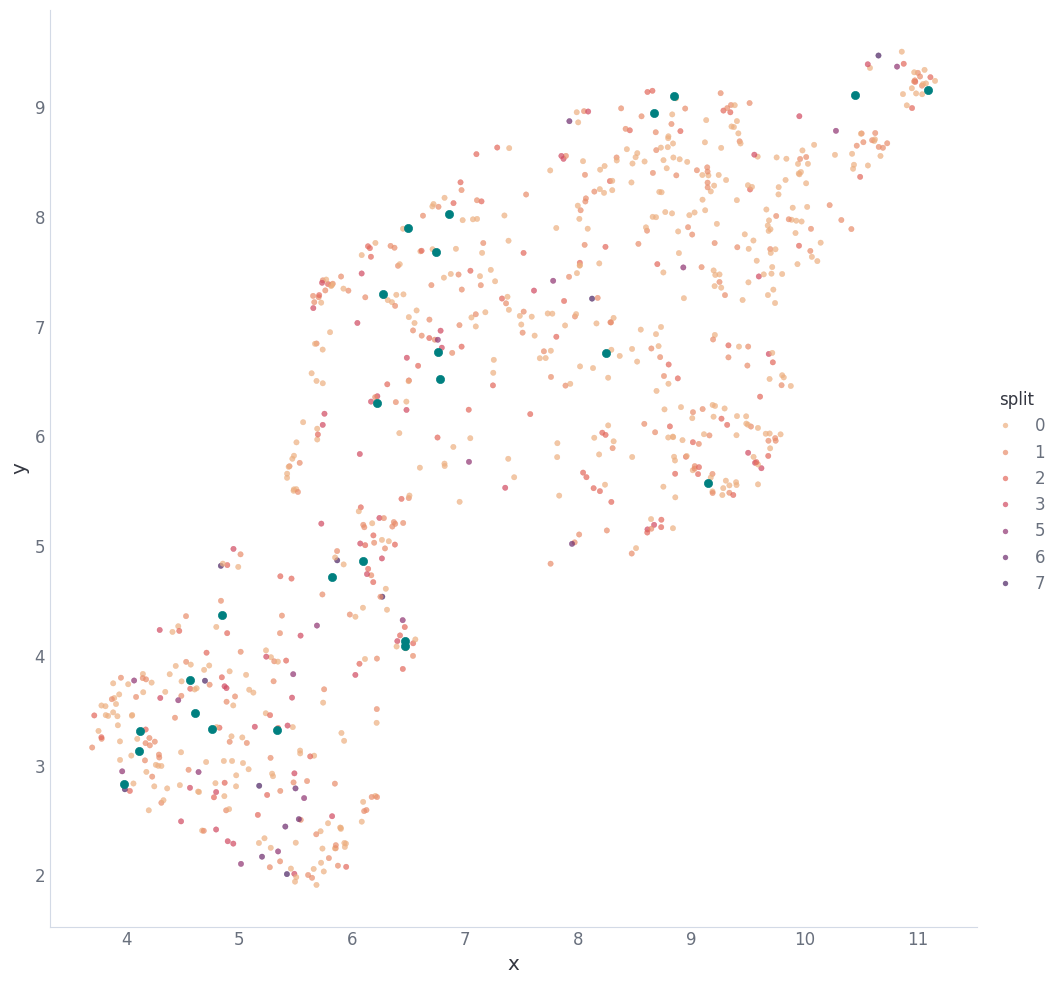

In [7]:
from umap import UMAP

umap_subs = full_df_nonweird.iloc[::100]

um = UMAP(n_neighbors=100, metric='manhattan')
umap_x = um.fit_transform(umap_subs.values)

um_df = pd.DataFrame(umap_x, columns=['x', 'y'], index=umap_subs.index)
um_df['split'] = splits

sns.relplot(um_df.query('split != 4'), x='x', y='y', ec=None, alpha=0.7, hue='split', s=15, height=10, palette='flare', legend='full')

sns.scatterplot(um_df.query('split == 4'), x='x', y='y', s=35, c='teal', ec=None, legend=None)

In [13]:
print(full_df.memory_usage().sum())
if 'inPizoe' in full_df.columns:
    full_df.rename(columns={'inPizoe': 'inPiezo'}, inplace=True)
for col in full_df:
    if set(full_df[col]) == {0., 1.}:
        print(col)
        full_df[col] = full_df[col].astype(bool)
    elif full_df.dtypes[col] == np.float64:
        full_df[col] = full_df[col].astype(np.float32)

full_df.memory_usage().sum()

104058968
Xshift_tsne
Xshift_umap
statY_delta_e
infoY_delta_e
statY_bandgap
infoY_bandgap
inRand1
inRand2
inRand3
inRand4
inRand5
inPiezo


52871448

In [31]:
full_df['dataset_split'] = splits
full_df['dataset_split'] = full_df['dataset_split'].astype(np.int8)
# full_df.to_csv('mpc_full_feats_scaled_split.csv', index=False)
if 'inRand1' in full_df.columns:
    full_df.rename(columns={
        f'inRand{i}': f'Rsplt{i}'
        for i in range(1, 6)
    }, inplace=True)
full_df.rename(columns={'inPiezo': 'piezo'}).to_feather('mpc_full_feats_scaled_split.feather')

In [ ]:
for split in set(splits):
    subs = full_df.query('dataset_split >= @split')
    subs.drop(columns=['dataset_split']).to_csv(f'splits/mpc_full_feats_scaled_{len(subs.index)}_{split}.csv', index=False)

In [28]:
full_df.iloc[:, -20:].groupby('dataset_split').sum().iloc[::-1].cumsum()

,magmom_pa,bandgap,delta_e,TSNE_x,TSNE_y,umap_x,umap_y,Xshift_tsne,Xshift_umap,statY_delta_e,infoY_delta_e,statY_bandgap,infoY_bandgap,inRand1,inRand2,inRand3,inRand4,inRand5,inPiezo
dataset_split,,,,,,,,,,,,,,,,,,,
7,265.727509,490.281097,-341.304718,-1971.331543,-8919.197266,6345.643066,3588.729736,83,138,81,18,29,50,84,73,79,78,89,3
6,360.382721,1055.039917,-772.346863,-5699.737793,-15074.312500,13043.078125,7096.000977,173,257,151,41,64,104,179,148,171,181,178,9
5,328.245178,2270.742920,-1746.382812,-11941.892578,-26816.140625,26362.488281,14477.216797,334,497,266,92,143,217,354,343,352,344,368,11
4,189.337006,4756.498047,-3908.266602,-23864.144531,-46602.679688,53330.339844,27981.078125,617,918,510,208,265,409,726,706,706,721,761,21
3,-66.880402,10555.886719,-9115.373047,-49764.101562,-77890.539062,105359.671875,52832.179688,1225,1702,1052,556,557,914,1494,1439,1504,1490,1481,49
2,-738.356201,23680.839844,-22319.652344,-80135.414062,-104165.437500,206913.937500,91526.609375,2454,3070,2198,1533,1244,2153,3002,3052,2979,3037,3025,96
1,-1342.657959,50424.132812,-54055.187500,-56534.828125,-105798.757812,406713.062500,144014.312500,5219,5637,4472,3898,2439,4505,6161,6162,6105,6119,6235,197
0,0.000000,99574.375000,-124281.742188,5567.914062,-85.562500,798710.625000,204831.359375,12571,12571,8382,8381,4191,8381,12571,12571,12571,12571,12571,382


In [29]:
full_df.columns[-30:-15]

Index(['mean SpaceGroupNumber', 'avg_dev SpaceGroupNumber',
       'mode SpaceGroupNumber', 'avg s valence electrons',
       'avg p valence electrons', 'avg d valence electrons',
       'avg f valence electrons', 'compound possible', 'max ionic char',
       'avg ionic char', 'magmom_pa', 'bandgap', 'delta_e', 'TSNE_x',
       'TSNE_y'],
      dtype='object')

In [ ]:
# import FADS
# import warnings

# subsample_size = 8192

# fastds = FADS.FADS(full_df_nonweird.values)

# with warnings.catch_warnings():
#     warnings.simplefilter('ignore')
#     ds_idx = fastds.DS(subsample_size)

# ds_idx